# Phase 2 Report

In [2]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  # visualization tool
import os as os

from IPython.display import HTML, display
from matplotlib.gridspec import GridSpec
from matplotlib import colors as mcolors
from matplotlib.ticker import MaxNLocator
from IPython.core.interactiveshell import InteractiveShell
from pandas.api.types import CategoricalDtype
from matplotlib.font_manager import FontProperties

from sklearn import preprocessing
sns.set(color_codes=True)
InteractiveShell.ast_node_interactivity = "all"

pd.set_option('display.max_columns', 80) #set options to display all the columns
# pd.set_option('display.float_format', lambda x: '%.f' % x)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

## Read the cleaned data from Phase 1

In [2]:
# sns.set(style="darkgrid")
# os.chdir('C:\\Users\\papnejar\\Desktop\\ml-jupyter')
# data = pd.read_csv('dataCleanedPhase1.csv', sep = ',')

In [3]:
import pickle

with open('data.pickle', 'rb') as f:
    # The protocol version used is detected automatically, so we do not
    # have to specify it.
    data = pickle.load(f)

In [4]:
data.shape

(25197, 79)

In [37]:
print(f"Count of data Types are: ")
data.dtypes.value_counts(sort=True)
print(f"Total Count: ")
data.dtypes.count()

Count of data Types are: 


category    26
category    24
category    11
int64        7
category     4
category     3
category     1
category     1
object       1
category     1
dtype: int64

Total Count: 


79

https://www.omnicalculator.com/other/screen-size

#### created this check dataset just for some validation purpose, later will change them back to data

In [6]:
check = data    

In [7]:
check['screenArea'] = data['screenw'] * data['screenh']

In [8]:
def BoxHistogramPlot(x, plottitle):
   f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, 
                                       gridspec_kw={"height_ratios": (.15, .85)});
   sns.boxplot(x, ax=ax_box);
   sns.distplot(x, ax=ax_hist);

   ax_box.set(yticks=[]);
   sns.despine(ax=ax_hist);
   sns.despine(ax=ax_box, left=True);
   f.suptitle(plottitle);
   plt.show();
   del f, ax_box, ax_hist

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


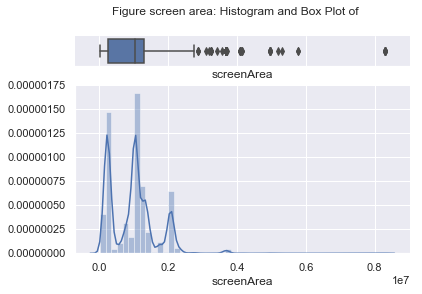

In [9]:
BoxHistogramPlot(data['screenArea'],
                     "Figure " + str("screen area") + ": Histogram and Box Plot of ")

In [10]:
check['screenArea'].quantile([.01,.25,.5,.75,.99])

0.01    170880.00
0.25    250125.00
0.50   1049088.00
0.75   1296000.00
0.99   2559600.00
Name: screenArea, dtype: float64

In [11]:
check.drop(['screenw', 'screenh'], axis = 1, inplace = True) 

In [12]:
check.dtypes #checking for datatypes again

Q1               category
Q2               category
Q3               category
Q4               category
Q5               category
Q6               category
Q7               category
Q8               category
Q9               category
Q10              category
Q11              category
Q12              category
Q13              category
Q14              category
Q15              category
Q16              category
Q17              category
Q18              category
Q19              category
Q20              category
Q21              category
Q22              category
Q23              category
Q24              category
Q25              category
Q26              category
country            object
introelapse         int64
testelapse          int64
surveyelapse        int64
                   ...   
VCL9             category
VCL10            category
VCL11            category
VCL12            category
VCL13            category
VCL14            category
VCL15            category
VCL16       

##### NA's in the variable [country] were creating issue in Phase 1 with dtypes changing so just used normal drop function and this seem tow work

In [13]:
for d in check.columns:
    if(check[d].isnull().sum() > 0):
        print(f"{d} {str(check[d].isnull().sum())}")
del d
# a = check['country'].isnull() 
# print(check[a])

country 3


In [14]:
check.dropna(inplace = True)

In [15]:
a = check['country'].isnull() 
print(a.sum())

0


In [16]:
# confirm those 3 rows are excluded for the dataset 
check.shape

(25194, 78)

In [17]:
print(f"Data Types count: " )
dtypeCount = check.dtypes.value_counts()
print(dtypeCount)

Data Types count: 
category    26
category    24
category    11
int64        6
category     4
category     3
category     1
category     1
category     1
object       1
dtype: int64


In [18]:
print(dtypeCount.sum())

78


In [19]:
a = check["country"].unique()
print(a)
len(a)

['US' 'GB' 'PL' 'CR' 'AU' 'NO' 'BG' 'MY' 'SE' 'IT' 'GL' 'NZ' 'ZA' 'CA'
 'NONE' 'HU' 'BR' 'CL' 'RS' 'AR' 'HR' 'DE' 'PE' 'HK' 'NL' 'ES' 'SI' 'PH'
 'JO' 'IN' 'BF' 'IE' 'BO' 'MX' 'FR' 'SK' 'RO' 'MK' 'DK' 'GR' 'PT' 'TT'
 'SG' 'IL' 'LT' 'BE' 'NP' 'TH' 'PK' 'RU' 'AT' 'VN' 'SZ' 'DZ' 'ID' 'FI'
 'BA' 'CZ' 'MO' 'KE' 'AL' 'SY' 'KR' 'UY' 'MZ' 'TR' 'BN' 'TZ' 'IR' 'CH'
 'SA' 'EC' 'LK' 'VU' 'TW' 'KW' 'QA' 'LU' 'GU' 'GH' 'ET' 'CO' 'FO' 'JP'
 'CN' 'JM' 'VE' 'UA' 'EG' 'AG' 'EE' 'CY' 'PR' 'AE' 'PY' 'MA' 'BD' 'MU'
 'BH' 'IS' 'NI' 'LV' 'DO' 'AZ' 'AF' 'VG' 'LB' 'NG' 'GE' 'SV' 'FJ' 'JE'
 'MT' 'TN' 'BB' 'PA' 'SD' 'LC' 'RE' 'HN' 'GT' 'CW' 'OM' 'BZ' 'SS' 'SL'
 'BS' 'MD' 'ZM' 'GY' 'RW' 'GF' 'BY' 'MV' 'VI' 'MN' 'MC' 'AX' 'KH' 'MW'
 'IM' 'HT' 'AM' 'ME' 'IQ' 'BW' 'MP' 'ZW' 'MG' 'FM' 'KZ' 'LA' 'UG' 'PS'
 'LY' 'KY' 'AO' 'GD' 'PG']


159

In [20]:
data['introelapse'].quantile([.01,.25,.5,.75,.99])

0.01      1.00
0.25      4.00
0.50     10.00
0.75     33.00
0.99   1917.56
Name: introelapse, dtype: float64

##### creating target dataset and the features dataset

In [21]:
check.drop(columns=['nerdy','country']).dtypes

Q1               category
Q2               category
Q3               category
Q4               category
Q5               category
Q6               category
Q7               category
Q8               category
Q9               category
Q10              category
Q11              category
Q12              category
Q13              category
Q14              category
Q15              category
Q16              category
Q17              category
Q18              category
Q19              category
Q20              category
Q21              category
Q22              category
Q23              category
Q24              category
Q25              category
Q26              category
introelapse         int64
testelapse          int64
surveyelapse        int64
TIPI1            category
                   ...   
VCL8             category
VCL9             category
VCL10            category
VCL11            category
VCL12            category
VCL13            category
VCL14            category
VCL15       

In [22]:
Data = check.drop(columns=['nerdy','country'])
target = check['nerdy']

In [23]:
Data.shape
target.shape

(25194, 76)

(25194,)

In [24]:
target.value_counts()

6    7552
7    6590
5    5925
4    3040
3     846
2     649
1     494
0      98
Name: nerdy, dtype: int64

In [25]:
# for now excluding country from being being one-hot encoded 
categorical_cols = Data.columns[~Data.columns.isin(['age','introelapse', 
                                              'testelapse', 'surveyelapse', 
                                              'screenArea', 
                                              'familysize', 'country', 'nerdy'])].tolist()

In [26]:
len(categorical_cols)

70

In [27]:
with open('data.orig.x', 'wb') as f:
    # Pickle the 'data' dictionary using the highest protocol available.
    pickle.dump(Data, f, pickle.HIGHEST_PROTOCOL)

In [28]:
with open('data.orig.y', 'wb') as f:
    # Pickle the 'data' dictionary using the highest protocol available.
    pickle.dump(target, f, pickle.HIGHEST_PROTOCOL)

##### Above pickle files can be directly used for modelling

In [29]:
# for col in categorical_cols:
#     n = len(Data[col].unique())
#     if (n == 2):
#         Data[col] = pd.get_dummies(Data[col], drop_first=True)
#     else:

# use one-hot-encoding for categorical features with >2 levels
Data = pd.get_dummies(Data, drop_first = False)

In [30]:
listCol = Data.columns

print(Data.columns.values)

['introelapse' 'testelapse' 'surveyelapse' 'age' 'familysize' 'screenArea'
 'Q1_0' 'Q1_1' 'Q1_2' 'Q1_3' 'Q1_4' 'Q1_5' 'Q2_0' 'Q2_1' 'Q2_2' 'Q2_3'
 'Q2_4' 'Q2_5' 'Q3_0' 'Q3_1' 'Q3_2' 'Q3_3' 'Q3_4' 'Q3_5' 'Q4_0' 'Q4_1'
 'Q4_2' 'Q4_3' 'Q4_4' 'Q4_5' 'Q5_0' 'Q5_1' 'Q5_2' 'Q5_3' 'Q5_4' 'Q5_5'
 'Q6_0' 'Q6_1' 'Q6_2' 'Q6_3' 'Q6_4' 'Q6_5' 'Q7_0' 'Q7_1' 'Q7_2' 'Q7_3'
 'Q7_4' 'Q7_5' 'Q8_0' 'Q8_1' 'Q8_2' 'Q8_3' 'Q8_4' 'Q8_5' 'Q9_0' 'Q9_1'
 'Q9_2' 'Q9_3' 'Q9_4' 'Q9_5' 'Q10_0' 'Q10_1' 'Q10_2' 'Q10_3' 'Q10_4'
 'Q10_5' 'Q11_0' 'Q11_1' 'Q11_2' 'Q11_3' 'Q11_4' 'Q11_5' 'Q12_0' 'Q12_1'
 'Q12_2' 'Q12_3' 'Q12_4' 'Q12_5' 'Q13_0' 'Q13_1' 'Q13_2' 'Q13_3' 'Q13_4'
 'Q13_5' 'Q14_0' 'Q14_1' 'Q14_2' 'Q14_3' 'Q14_4' 'Q14_5' 'Q15_0' 'Q15_1'
 'Q15_2' 'Q15_3' 'Q15_4' 'Q15_5' 'Q16_0' 'Q16_1' 'Q16_2' 'Q16_3' 'Q16_4'
 'Q16_5' 'Q17_0' 'Q17_1' 'Q17_2' 'Q17_3' 'Q17_4' 'Q17_5' 'Q18_0' 'Q18_1'
 'Q18_2' 'Q18_3' 'Q18_4' 'Q18_5' 'Q19_0' 'Q19_1' 'Q19_2' 'Q19_3' 'Q19_4'
 'Q19_5' 'Q20_0' 'Q20_1' 'Q20_2' 'Q20_3' 'Q20_4' 'Q20_5' 'Q21_0

In [31]:
Data.head()

introelapse  testelapse  surveyelapse  age  familysize  screenArea  Q1_0  \
0           41          93           125   69           4     3573360     0   
1           13         131           161   50           3      456036     0   
2            2          49            87   22           2     1049088     0   
3           26         710           228   44           4      786432     0   
4            6         195           424   17           1     1049088     0   

   Q1_1  Q1_2  Q1_3  Q1_4  Q1_5  Q2_0  Q2_1  Q2_2  Q2_3  Q2_4  Q2_5  Q3_0  \
0     0     0     1     0     0     0     0     0     0     0     1     0   
1     0     0     0     1     0     0     0     0     0     1     0     0   
2     0     0     0     0     1     0     0     0     0     0     1     0   
3     0     0     0     0     1     0     0     0     0     0     1     0   
4     0     0     0     1     0     0     0     0     0     1     0     0   

   Q3_1  Q3_2  Q3_3  Q3_4  Q3_5  Q4_0  Q4_1  Q4_2  Q4_3  Q4_4  Q4_5  Q5_0  \
0     0     0     1     0     0     0     0     0     1     0     0     0   
1     0     0     0     1     0     0     0     0     1     0     0     0   
2     0     0     0     0     1     0     0     0     0     0     1     0   
3     0     0     0     0     1     0     0     0     0     0     1     0   
4     0     0     0     1     0     0     0     0     0     1     0     0   

   Q5_1  Q5_2  Q5_3  Q5_4  Q5_5  Q6_0  Q6_1  Q6_2  Q6_3  ...    religion_5  \
0     0     0     0     0     1     0     0     0     0  ...             0   
1     0     0     0     0     1     0     0     1     0  ...             0   
2     0     0     0     0     1     0     0     0     0  ...             0   
3     0     0     0     0     1     0     0     0     0  ...             0   
4     0     0     0     1     0     0     0     0     0  ...             0   

   religion_6  religion_7  religion_8  religion_9  religion_10  religion_11  \
0           1           0           0           0            0            0   
1           0           0           0           0            0            0   
2           0           0           0           0            0            0   
3           0           0           0           0            0            0   
4           0           1           0           0            0            0   

   religion_12  orientation_0  orientation_1  orientation_2  orientation_3  \
0            0              0              1              0              0   
1            0              0              1              0              0   
2            0              0              0              1              0   
3            0              0              1              0              0   
4            0              0              0              0              0   

   orientation_4  orientation_5  voted_0  voted_1  voted_2  married_0  \
0              0              0        0        1        0          0   
1              0              0        0        1        0          0   
2              0              0        0        1        0          0   
3              0              0        0        0        1          0   
4              1              0        0        0        1          0   

   married_1  married_2  married_3  race_arab_0  race_arab_1  race_asian_0  \
0          0          0          1            1            0             1   
1          1          0          0            1            0             1   
2          1          0          0            1            0             1   
3          0          0          1            1            0             1   
4          1          0          0            1            0             1   

   race_asian_1  race_black_0  race_black_1  race_white_0  race_white_1  \
0             0             1             0             0             1   
1             0             1             0             0             1   
2             0             1             0             

In [32]:
Data_df = Data.copy() # copying data to another df before we scale

Data_scaler = preprocessing.MinMaxScaler()
print(Data_scaler)

Data_scaler.fit(Data)
Data = Data_scaler.fit_transform(Data)

MinMaxScaler(copy=True, feature_range=(0, 1))


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


MinMaxScaler(copy=True, feature_range=(0, 1))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [33]:
pd.DataFrame(Data, columns=Data_df.columns).sample(5, random_state=999)

introelapse  testelapse  surveyelapse  age  familysize  screenArea  \
13837         0.01        0.12          0.17 0.04        0.04        0.07   
16249         0.01        0.06          0.15 0.06        0.13        0.12   
15839         0.01        0.16          0.25 0.13        0.09        0.12   
24268         0.00        0.08          0.14 0.04        0.09        0.15   
1997          0.01        0.14          0.23 0.02        0.09        0.12   

       Q1_0  Q1_1  Q1_2  Q1_3  Q1_4  Q1_5  Q2_0  Q2_1  Q2_2  Q2_3  Q2_4  Q2_5  \
13837  0.00  0.00  0.00  1.00  0.00  0.00  0.00  0.00  0.00  1.00  0.00  0.00   
16249  0.00  0.00  0.00  0.00  1.00  0.00  0.00  0.00  0.00  0.00  1.00  0.00   
15839  0.00  0.00  0.00  0.00  1.00  0.00  0.00  0.00  0.00  0.00  1.00  0.00   
24268  0.00  1.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  1.00  0.00  0.00   
1997   0.00  0.00  0.00  0.00  1.00  0.00  0.00  0.00  0.00  1.00  0.00  0.00   

       Q3_0  Q3_1  Q3_2  Q3_3  Q3_4  Q3_5  Q4_0  Q4_1  Q4_2  Q4_3  Q4_4  Q4_5  \
13837  0.00  0.00  0.00  0.00  1.00  0.00  0.00  0.00  0.00  1.00  0.00  0.00   
16249  0.00  0.00  0.00  0.00  0.00  1.00  0.00  0.00  0.00  0.00  1.00  0.00   
15839  0.00  0.00  0.00  0.00  1.00  0.00  0.00  0.00  0.00  0.00  1.00  0.00   
24268  0.00  1.00  0.00  0.00  0.00  0.00  0.00  1.00  0.00  0.00  0.00  0.00   
1997   0.00  0.00  0.00  0.00  0.00  1.00  0.00  0.00  0.00  1.00  0.00  0.00   

       Q5_0  Q5_1  Q5_2  Q5_3  Q5_4  Q5_5  Q6_0  Q6_1  Q6_2  Q6_3  ...    \
13837  0.00  1.00  0.00  0.00  0.00  0.00  0.00  1.00  0.00  0.00  ...     
16249  0.00  0.00  0.00  1.00  0.00  0.00  0.00  0.00  0.00  0.00  ...     
15839  0.00  0.00  1.00  0.00  0.00  0.00  0.00  0.00  1.00  0.00  ...     
24268  0.00  1.00  0.00  0.00  0.00  0.00  0.00  1.00  0.00  0.00  ...     
1997   0.00  0.00  0.00  0.00  1.00  0.00  0.00  0.00  1.00  0.00  ...     

       religion_5  religion_6  religion_7  religion_8  religion_9  \
13837        0.00        0.00        0.00        0.00        0.00   
16249        0.00        0.00        0.00        0.00        0.00   
15839        0.00        0.00        0.00        0.00        0.00   
24268        0.00        0.00        0.00        0.00        0.00   
1997         0.00        0.00        0.00        0.00        0.00   

       religion_10  religion_11  religion_12  orientation_0  orientation_1  \
13837         0.00         0.00         0.00           0.00           0.00   
16249         0.00         0.00         0.00           0.00           0.00   
15839         0.00         0.00         1.00           0.00           1.00   
24268         0.00         0.00         0.00           0.00           1.00   
1997          0.00         0.00         0.00           0.00           1.00   

       orientation_2  orientation_3  orientation_4  orientation_5  voted_0  \
13837           1.00           0.00           0.00           0.00     0.00   
16249           1.00           0.00           0.00           0.00     0.00   
15839           0.00           0.00           0.00           0.00     0.00   
24268           0.00           0.00           0.00           0.00     0.00   
1997            0.00           0.00           0.00           0.00     0.00   

       voted_1  voted_2  married_0  married_1  married_2  married_3  \
13837     0.00     1.00       0.00       1.00       0.00       0.00   
16249     0.00     1.00       0.00       1.00       0.00       0.00   
15839     1.00     0.00       0.00       1.00       0.00       0.00   
24268     0.00     1.00       0.00       1.00       0.00       0.00   
1997      0.00     1.00       0.00       1.00       0.00       0.00   

       race_arab_0  race_arab_1  race_asian_0  race_asian_1  race_black_0  \
13837         1.00         0.00          1.00          0.00          1.00   
16249         1.00         0.00          1.00          0.00          1.00   
15839         1.00         0.00          1.00          0.00          1.00   
24268         1.00       

In [34]:
colList = Data_df.columns

In [43]:
type(Data_df.columns)

pandas.core.indexes.base.Index

In [44]:
type(colList)

pandas.core.indexes.base.Index

In [35]:
def cumputeCorrelation(x, y):
    return np.corrcoef(x, y)[1,0]

def correlationMatrix(df):
    corMatrix = np.zeros(shape=(df.shape[1],df.shape[1]))
    for x in range(0, df.shape[1]):
        for y in range(0, df.shape[1]):
            corMatrix[x][y] = cumputeCorrelation(df[:,x], df[:,y])
    return corMatrix

correlationMatrixData = correlationMatrix(Data)

In [36]:
print(correlationMatrixData.shape)

(339, 339)


### Pickle object after one-hot encoding

In [37]:
with open('data.clean.pickle', 'wb') as f:
    # Pickle the 'data' dictionary using the highest protocol available.
    pickle.dump(Data, f, pickle.HIGHEST_PROTOCOL)

In [38]:
with open('data.scaler.pickle', 'wb') as f:
    # Pickle the 'data' dictionary using the highest protocol available.
    pickle.dump(Data_scaler, f, pickle.HIGHEST_PROTOCOL)

In [39]:
with open('data.corr.pickle', 'wb') as f:
    # Pickle the 'data' dictionary using the highest protocol available.
    pickle.dump(correlationMatrixData, f, pickle.HIGHEST_PROTOCOL)

In [40]:
with open('data.target.pickle', 'wb') as f:
    # Pickle the 'data' dictionary using the highest protocol available.
    pickle.dump(target, f, pickle.HIGHEST_PROTOCOL)

In [41]:
with open('data.columns.pickle', 'wb') as f:
    # Pickle the 'data' dictionary using the highest protocol available.
    pickle.dump(listCol, f, pickle.HIGHEST_PROTOCOL)

In [42]:
with open('data.ohcolumns.pickle', 'wb') as f:
    # Pickle the 'data' dictionary using the highest protocol available.
    pickle.dump(colList, f, pickle.HIGHEST_PROTOCOL)